In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

## Specify simulation conditions

In [2]:
N = 300000
param_name = 'param_base'
seed = 42

q_e, q_p =  0.8, 0.1
q_s, q_v = 0.05, 0.05

## Plot raster

In [3]:
data = scipy.io.loadmat(f'results/{param_name}/spikes_{N}_seed_{seed}.mat')
spikes = data['s'][:,(data['s'][0,:] <= 100)]
del(data)

espikes = spikes[:, (spikes[1, :] < N*q_e)]
pv_mask = (spikes[1, :] >= N*q_e) & (spikes[1, :] <= N*(q_e + q_p))
pspikes = spikes[:, pv_mask]
sst_mask = (spikes[1, :] >= N*(q_e+q_p)) & (spikes[1, :] <= N*(q_e + q_p + q_s))
sspikes = spikes[:, sst_mask]
# vip_mask = (spikes[1, :] >= 20000*(q_e+q_p+q_s)) & (spikes[1, :] <= 20000*(q_e + q_p + q_s))
vspikes = spikes[:, np.where(spikes[1, :] >= N*(q_e+q_p+q_s))]


## optional filtering
espikes = espikes[:, (espikes[1, :] % (16*5) == 0)]
pspikes = pspikes[:, (pspikes[1, :] % (2*5) == 0)]
sspikes = sspikes[:, (sspikes[1, :] % (1*5) == 0)]
vspikes = vspikes[:, (vspikes[1, :] % (1*5) == 0)]

espikes[1, :] = espikes[1, :] / (N*q_e)

pspikes[1,:] = pspikes[1, :] - N*q_e
pspikes[1,:] = pspikes[1, :] / (N*q_p)

sspikes[1,:] = sspikes[1, :] - N*(q_e + q_p)
sspikes[1,:] = sspikes[1, :] / (N*q_s)

vspikes[1,:] = vspikes[1, :] - N*(q_e + q_p + q_s)
vspikes[1,:] = vspikes[1, :] / (N*q_v)

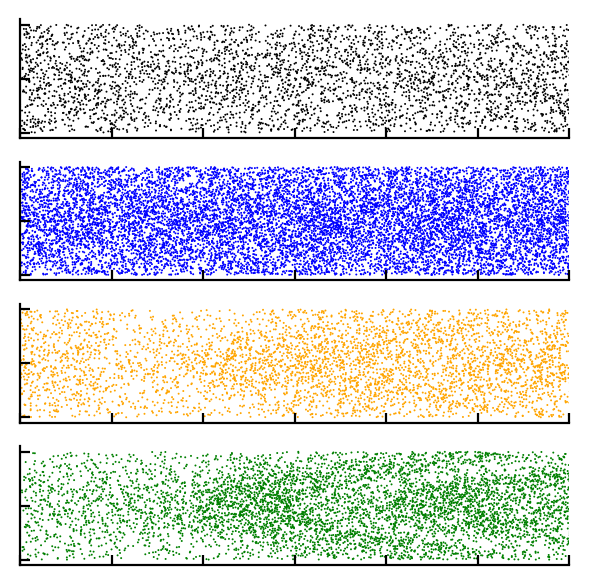

In [4]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
fig, axs = plt.subplots(4, 1, gridspec_kw={'height_ratios': [1, 1, 1, 1]}, figsize=(90/25.4, 90/25.4), dpi=200)

axs[0].scatter(espikes[0,:], espikes[1,:], c='black', s=.5, edgecolors='none')
axs[1].scatter(pspikes[0,:], pspikes[1,:], c='blue', s=.5, edgecolors='none')
axs[2].scatter(sspikes[0,:], sspikes[1,:], c='orange', s=.5, edgecolors='none')
axs[3].scatter(vspikes[0,:], vspikes[1,:], c='green', s=.5, edgecolors='none')

for ax in axs:
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='in', which='both')
    ax.set_xticklabels([])
    ax.set_xlim(0,60)
    ax.set_yticks([0,0.5,1])
    ax.set_yticklabels([])

plt.savefig('figs/Fig1e_left.png')
plt.show()

In [5]:
data = scipy.io.loadmat(f'results/{param_name}/spikes_{N}_seed_{seed}.mat')
spikes = data['s'][:,(data['s'][0,:] >= 200) & (data['s'][0,:] <= 230)]
del(data)

espikes = spikes[:, (spikes[1, :] < N*q_e)]
pv_mask = (spikes[1, :] >= N*q_e) & (spikes[1, :] <= N*(q_e + q_p))
pspikes = spikes[:, pv_mask]
sst_mask = (spikes[1, :] >= N*(q_e+q_p)) & (spikes[1, :] <= N*(q_e + q_p + q_s))
sspikes = spikes[:, sst_mask]
# vip_mask = (spikes[1, :] >= 20000*(q_e+q_p+q_s)) & (spikes[1, :] <= 20000*(q_e + q_p + q_s))
vspikes = spikes[:, np.where(spikes[1, :] >= N*(q_e+q_p+q_s))]


## optional filtering
espikes = espikes[:, (espikes[1, :] % (16*5) == 0)]
pspikes = pspikes[:, (pspikes[1, :] % (2*5) == 0)]
sspikes = sspikes[:, (sspikes[1, :] % (1*5) == 0)]
vspikes = vspikes[:, (vspikes[1, :] % (1*5) == 0)]

espikes[1, :] = espikes[1, :] / (N*q_e)

pspikes[1,:] = pspikes[1, :] - N*q_e
pspikes[1,:] = pspikes[1, :] / (N*q_p)

sspikes[1,:] = sspikes[1, :] - N*(q_e + q_p)
sspikes[1,:] = sspikes[1, :] / (N*q_s)

vspikes[1,:] = vspikes[1, :] - N*(q_e + q_p + q_s)
vspikes[1,:] = vspikes[1, :] / (N*q_v)

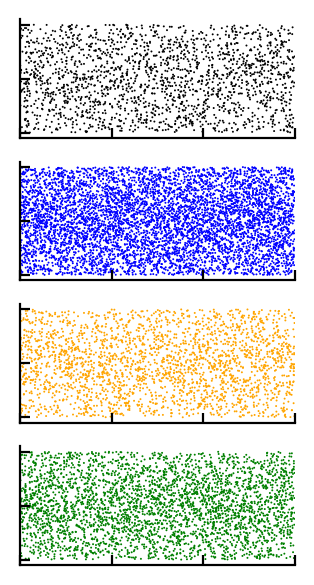

In [6]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
fig, axs = plt.subplots(4, 1, gridspec_kw={'height_ratios': [1, 1, 1, 1]}, figsize=(45/25.4, 90/25.4), dpi=200)

axs[0].scatter(espikes[0,:], espikes[1,:], c='black', s=.5, edgecolor='none')
axs[1].scatter(pspikes[0,:], pspikes[1,:], c='blue', s=.5, edgecolor='none')
axs[2].scatter(sspikes[0,:], sspikes[1,:], c='orange', s=.5, edgecolor='none')
axs[3].scatter(vspikes[0,:], vspikes[1,:], c='green', s=.5, edgecolor='none')

for ax in axs:
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    ax.tick_params(direction='in', which='both')
    ax.set_xticklabels([])
    ax.set_xlim(200,230)
    ax.set_yticks([0,0.5,1])
    ax.set_yticklabels([])

plt.savefig('figs/Fig1e_right.png')
plt.show()